<h1><u>Week - 5: Group Activity on Presentation of Data</u></h1>

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h5><i>Reading the 'Telco-Customer-Churn.xls' file using read_excel()<i></h5>  

In [109]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


<h5><i>Displaying the <b>first 5 observations</b> using the head()</i></h5>

In [110]:
df=pd.read_excel('/content/gdrive/MyDrive/ICTAK/Telco-Customer-Churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<h5><i>Displaying the <b>last 5 observations</b> using the tail(). </br><b>7043</b> observations found!</i></h5>

In [111]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


<h5><i>Check for the null values present in the data</i></h5>

In [112]:
df[df.isna().any(axis=1)]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


<h5><i>No Null Values Found!</i></h5>

<h2>Carry out Visualization for the following questions:</h2>

<h4><b>1. Compare churn count with respect to gender</b></h4>

In [113]:
fc=(df['gender']=='Female').sum()
mc=(df['gender']=='Male').sum()
mcc = ((df['gender']=='Male') & (df['Churn']=='Yes')).sum()
fcc = ((df['gender']=='Female') & (df['Churn']=='Yes')).sum()
print("Out of the",fc,"Females,",fcc,"have Churns, whereas, out of",mc,"Males,",mcc,"have Churns")

Out of the 3488 Females, 939 have Churns, whereas, out of 3555 Males, 930 have Churns


<h5><i>Plotting a <b>Count Chart</b> with <b>Gender</b> along the <b>X-axis</b> and <b>Churn Count</b> along the <b>Y-axis</b></i></h5>

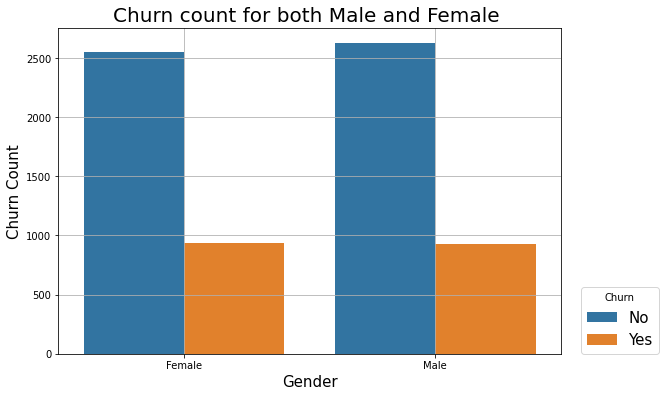

In [114]:
plt.figure(figsize = (9,6))
sns.countplot(x='gender',hue='Churn',data=df)
plt.xlabel("Gender", fontsize='15')
plt.ylabel("Churn Count", fontsize='15')
plt.title("Churn count for both Male and Female ", fontsize='20')
plt.legend(loc=(1.04,0),title="Churn",prop={'size': 15})
plt.grid()
plt.show()

<h5><i><b><u>Insights:</u></b></br>
<ul>
<li>2549 Females have No Churns</li>
<li>939 Females have Churns</li>
<li>2625 Males have No Churns</li>
<li>930 Males have Churns</li>
</ul>
</i></h5>

<h4><b>2. Find out how many female senior citizens there in the dataset</b></h4>

<h5><i>Counting the number of female customers</i></h5>

In [115]:
(df['gender']=='Female').sum()

3488

<h5><i>Among the customers, <b>3488</b> are <b>Females</b></i></h5>

<h5><i>Finding the no: of observations, by checking the <b>'SeniorCitizen'</b> feature having value greater than 0 and <b>'gender'</b> feature having value <b>'Female'</b></i></h5>

In [116]:
df.loc[(df['SeniorCitizen']>0) & (df['gender']=='Female')].shape

(568, 21)

<h5><i><b><u>Insights:</u></b> </br>
 Among the <b>3488</b> female customers, <b>568</b> are Senior Citizens.</i></h5>

<h4><b>3. Compare 'tenure' with 'Total Charges'</b></h4>

<h5><i>Converting the datatype of <b>TotalCharges</b> from <b>Object</b> to <b>Float</b>

In [117]:
df ['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.replace(np.nan, 0, regex=True)

<h5><i>Selecting <b>'tenure'</b> and <b>'TotalCharges'</b> features from the dataset</i></h5>

In [118]:
df.loc[:,['tenure', 'TotalCharges']]

,tenure,TotalCharges
0,1,29.85
1,34,1889.50
2,2,108.15
3,45,1840.75
4,2,151.65
...,...,...
7038,24,1990.50
7039,72,7362.90
7040,11,346.45
7041,4,306.60


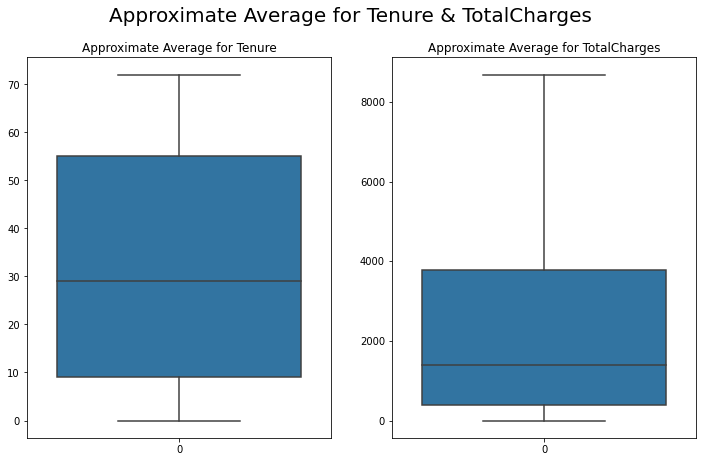

In [119]:
fig, axes = plt.subplots(1,2,figsize=(12,7))
fig.suptitle('Approximate Average for Tenure & TotalCharges',fontsize=20)
axes[0].set_title('Approximate Average for Tenure')
axes[1].set_title('Approximate Average for TotalCharges')
sns.boxplot(ax=axes[0],data=df['tenure'])
sns.boxplot(ax=axes[1],data=df['TotalCharges'])

<h5><i>The Median for <b>Tenure</b> lies around <b>29.0</b></br>
The Median for <b>TotalCharges</b> lies around <b>1394.55</b></i></h5>

<h4><b>4. Find out which contract preferred by the senior citizen</b></h4>

<h5><i>Counting the total number of Senior Citizens in the dataset by using sum()</i></h5>

In [120]:
(df['SeniorCitizen'] > 0).sum()

1142

<h5><i>The total number of Senior Citizens is <b>1142</b></i></h5>

<h5><i>Selecting <b>'Contract'</b> and <b>'SeniorCitizen'</b> features where <b>'SeniorCitizen'</b> feature having value greater than 0, from the dataset</i></h5>

In [121]:
df.loc[df['SeniorCitizen'] > 0, ['Contract']].value_counts().to_frame()

,0
Contract,
Month-to-month,807
One year,190
Two year,145


<h5><i>Plotting a <b>Pie chart </b></i></h5>

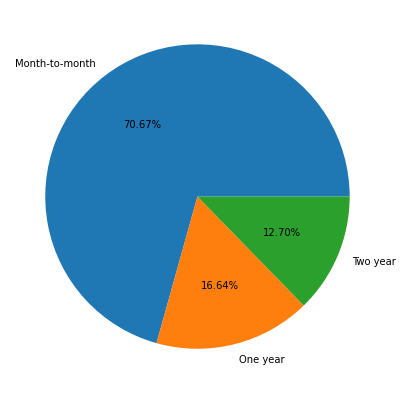

In [122]:
fig = plt.figure(figsize =(10, 7))
plt.pie(df.loc[df['SeniorCitizen'] > 0, ['Contract']].value_counts().to_list(), labels = list(df['Contract'].unique()),autopct='%1.2f%%')
plt.show()

<h5><i><b><u>Insights:</u></b> </br>
Among the <b>1142 Senior Citizens</b>, </br>
<b>807</b> senior citizens have chosen <b>'Month-to-month'</b> </br>
<b>190</b> senior citizens have chosen <b>'One year'</b> </br>
<b>145</b> senior citizens have chosen <b>'Two year'</b></br>
Most widely used contract is <b>Month-to-Month</b></i></h5>

<h4><b>5. Comment on your finds on Payment Method?</b></h4>

<h5><i>Counting the different Payment Method parameters by using value_counts()</i></h5>

In [123]:
(df['PaymentMethod']).value_counts().to_frame()

,PaymentMethod
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


<h5><i>Plotting a <b>Histogram</b> with the <b>Various Payment Methods</b> along the x-axis and their <b>Frequency</b> along the y-axis

Text(0, 0.5, 'Frequency')

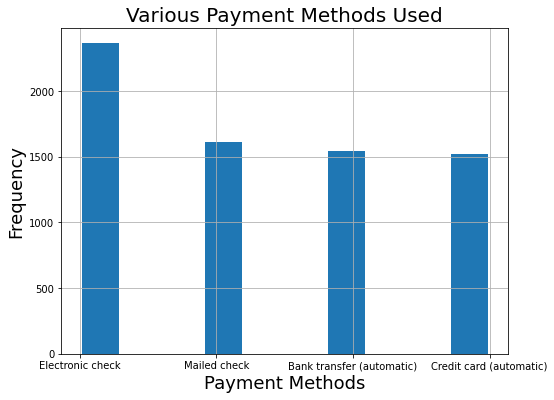

In [124]:
plt.figure(figsize=(8,6))
(df['PaymentMethod']).hist(rwidth=0.9)
plt.title("Various Payment Methods Used",fontsize=20)
plt.xlabel('Payment Methods', fontsize=18)
plt.ylabel('Frequency', fontsize=18)

<h5><i><b><u>Insights:</u></b></br>
Among the <b>7043 customers</b>,
<ul>
<li><b>2365</b> opted <b>'Electronic check'</b> Payment Method </li>
<li><b>1612</b> opted <b>'Bank transfer (automatic)'</b> Payment Method </li>
<li><b>1522</b> opted <b>'Credit card (automatic)'</b> Payment Method </li>
</ul>
Most widely used Payment method is <b>Electonic check</b></i></h5>